In [114]:
# Step 1: Importing all the libraries we need
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

# 🐿️ NYC Squirrel Census Analysis

This notebook explores squirrel sightings recorded in Central Park (October 2018).  
We’ll clean the dataset, handle missing values, and perform exploratory data analysis (EDA) to uncover patterns in squirrel activity.  

---

## 📌 1. Introduction  
- Dataset: Squirrel Census 2018 (Central Park)  
- Rows: ~699 observations  
- Goal: Analyze squirrel sightings by date, shift, location, and conditions.  

---

## 🧹 2. Data Cleaning  
### 2.1 Handling Missing Values  
- Dropped columns with too many nulls (`Hectare Conditions Notes`, `Litter Notes`).  
- Filled missing categorical values:  
  - `Litter Notes`: filled `NaN` as `"None"`.  
  - `Other Animal Sightings`: filled `NaN` as `"Missing"`.  
  - `Hectare Conditions`: filled `NaN` as `"Not recorded"`.  
- Filled missing numerical values:  
  - `Total Time of Sighting`: filled with **mode** (most common value).  

---

## 🔍 3. Exploratory Data Analysis (EDA)  
### 3.1 Squirrel Sightings by Location  
- Top 10 hectares with the most squirrel activity → **bar chart**.  

### 3.2 Squirrel Sightings by Shift (AM/PM)  
- Pie chart showing **50% AM vs 50% PM** → balanced dataset.  

### 3.3 Hectare Conditions  
- Bar plot shows most sightings occurred in **Busy** and **Calm** conditions.  

### 3.4 Daily Trends  
- Converted `Date` from `mmddyy` → datetime, created `Day` column.  
- Line plot shows **peak on Oct 13th**, then gradual decline.  

### 3.5 Litter Levels  
- Bar plot shows squirrel activity across litter categories: `None`, `Some`, `Abundant`.  

### 3.6 Number of Sighters  
- Bar chart: Most sightings made by **1 observer**.  
- Scatter plot: Shows variation in squirrels spotted per session (1–23).  

---

## 📊 4. Key Findings  
- **Busy** and **Calm** hectares hosted most squirrel activity.  
- Observations were evenly split between **AM** and **PM**.  
- **October 13th** had the highest sightings (over 430).  
- Most data collected by **single observers**.  
- Litter presence varied but didn’t dominate the dataset.  

---

## ✅ 5. Conclusion  
The NYC Squirrel Census reveals clear patterns in squirrel activity by location, time, and conditions.  
Future analysis could explore:  
- Linking squirrel behavior to environmental factors.  
- Modeling daily activity trends.  
- Comparing sightings with external factors like weather.  


In [115]:
df = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Hectare_Data_20250826.csv')
# 📝 Step 2: Load the dataset (replace with your file path or link)

In [116]:
df.head() # 👀 Quick peek at the first 5 rows


,Hectare,Shift,Date,Anonymized Sighter,Sighter Observed Weather Data,Litter,Litter Notes,Other Animal Sightings,Hectare Conditions,Hectare Conditions Notes,Number of sighters,Number of Squirrels,Total Time of Sighting
0,01A,AM,10072018,110.0,"70º F, Foggy",Some,NaN,"Humans, Pigeons",Busy,NaN,1,4,22.0
1,01A,PM,10142018,177.0,"54º F, overcast",Abundant,NaN,"Humans, Pigeons",Busy,NaN,1,7,26.0
2,01B,AM,10122018,11.0,"60º F, sunny",Some,NaN,"Humans, Dogs, Pigeons, Horses",Busy,NaN,1,17,23.0
3,01B,PM,10192018,109.0,"59.8º F, Sun, Cool",Some,NaN,"Humans, Dogs, Pigeons, Sparrow, Blue jay",Busy,NaN,1,10,35.0
4,01C,PM,10132018,241.0,"55° F, Partly Cloudy",NaN,NaN,"Humans, Dogs, Pigeons, Birds",Busy,NaN,1,10,25.0


In [117]:
df.tail(5) # Quick peek at the last 5 rows 

,Hectare,Shift,Date,Anonymized Sighter,Sighter Observed Weather Data,Litter,Litter Notes,Other Animal Sightings,Hectare Conditions,Hectare Conditions Notes,Number of sighters,Number of Squirrels,Total Time of Sighting
695,09A,AM,10132018,1.791802e+08,NaN,Some,NaN,"Humans, Dogs, Pigeons, Rats, Blue jays",Busy,NaN,3,12,20.0
696,11F,PM,10062018,1.680000e+02,NaN,Some,NaN,"Humans, Dogs, Pigeons",Busy,NaN,3,3,26.0
697,12G,PM,10072018,1.061071e+02,80º F,NaN,NaN,"Humans, Cat bird",Busy,NaN,3,7,29.0
698,12H,PM,10072018,1.061071e+02,79º F,NaN,NaN,"Humans, Sparrows",Busy,NaN,3,8,30.0
699,26A,PM,10062018,1.850000e+02,NaN,NaN,NaN,"Horse, Pony",NaN,NaN,3,6,30.0


In [118]:
df.describe() # df.describe() gives summary stats (count, mean, std, min, max, quartiles)

,Date,Anonymized Sighter,Number of sighters,Number of Squirrels,Total Time of Sighting
count,7.000000e+02,7.000000e+02,700.000000,700.000000,680.000000
mean,1.012160e+07,7.261435e+05,1.142857,4.317143,24.907353
std,4.328731e+04,1.096542e+07,0.388891,3.559748,6.916839
min,1.006202e+07,1.000000e+00,1.000000,0.000000,1.000000
25%,1.008202e+07,8.000000e+01,1.000000,2.000000,20.000000
50%,1.012702e+07,1.550000e+02,1.000000,4.000000,24.000000
75%,1.014202e+07,2.400000e+02,1.000000,6.000000,26.000000
max,1.020202e+07,1.791802e+08,3.000000,23.000000,70.000000


In [119]:
df.info() # df.info() shows column names, data types, and non-null counts
# Great for spotting missing data and making sure types (int, float, object) are correct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hectare                        700 non-null    object 
 1   Shift                          700 non-null    object 
 2   Date                           700 non-null    int64  
 3   Anonymized Sighter             700 non-null    float64
 4   Sighter Observed Weather Data  681 non-null    object 
 5   Litter                         319 non-null    object 
 6   Litter Notes                   6 non-null      object 
 7   Other Animal Sightings         668 non-null    object 
 8   Hectare Conditions             660 non-null    object 
 9   Hectare Conditions Notes       74 non-null     object 
 10  Number of sighters             700 non-null    int64  
 11  Number of Squirrels            700 non-null    int64  
 12  Total Time of Sighting         680 non-null    flo

In [120]:
df.columns # To see columns name 

Index(['Hectare', 'Shift', 'Date', 'Anonymized Sighter',
       'Sighter Observed Weather Data', 'Litter', 'Litter Notes',
       'Other Animal Sightings', 'Hectare Conditions',
       'Hectare Conditions Notes', 'Number of sighters', 'Number of Squirrels',
       'Total Time of Sighting'],
      dtype='object')

In [121]:
df.isnull().sum() # df.isnull().sum() counts how many null (NaN) values each column has


Hectare                            0
Shift                              0
Date                               0
Anonymized Sighter                 0
Sighter Observed Weather Data     19
Litter                           381
Litter Notes                     694
Other Animal Sightings            32
Hectare Conditions                40
Hectare Conditions Notes         626
Number of sighters                 0
Number of Squirrels                0
Total Time of Sighting            20
dtype: int64

### 🧹 Dropping Useless Columns

The columns **`Hectare Conditions Notes`** and **`Litter Notes`** had **694,626 missing values** out of a total of **699 rows**.  
Since they were basically empty (almost no useful data), we decided to remove them from the dataset.  

👉 This helps keep the dataframe clean and avoids carrying around unnecessary columns.


In [122]:
df = df.drop(columns=["Hectare Conditions Notes", "Litter Notes"])

In [123]:
df.columns

Index(['Hectare', 'Shift', 'Date', 'Anonymized Sighter',
       'Sighter Observed Weather Data', 'Litter', 'Other Animal Sightings',
       'Hectare Conditions', 'Number of sighters', 'Number of Squirrels',
       'Total Time of Sighting'],
      dtype='object')

In [124]:
df.isnull().sum()

Hectare                            0
Shift                              0
Date                               0
Anonymized Sighter                 0
Sighter Observed Weather Data     19
Litter                           381
Other Animal Sightings            32
Hectare Conditions                40
Number of sighters                 0
Number of Squirrels                0
Total Time of Sighting            20
dtype: int64

In [125]:
df['Litter'].value_counts()

Litter
Some        291
Abundant     28
Name: count, dtype: int64

In [126]:
df["Litter"] = df["Litter"].fillna("None")

### 📝 Handling `Litter Notes` Column

The **`Litter Notes`** column originally had three categories:  
- `None`  
- `Some`  
- `Abundant`  

However, many entries were marked as `NaN`, which pandas treated as missing values.  
To fix this, we used **`fillna('None')`** so that all blank values are counted as `"None"` instead of being treated as nulls.  

👉 This way, the column now correctly represents the litter categories without losing information.


In [127]:
df.isnull().sum()

Hectare                           0
Shift                             0
Date                              0
Anonymized Sighter                0
Sighter Observed Weather Data    19
Litter                            0
Other Animal Sightings           32
Hectare Conditions               40
Number of sighters                0
Number of Squirrels               0
Total Time of Sighting           20
dtype: int64

In [128]:
# Value_counts() is like quick "popularity contest" for your column values
df['Other Animal Sightings'].value_counts().head(10)

Other Animal Sightings
Humans, Dogs                 177
Humans                        59
Humans, Dogs, Pigeons         42
Humans, Dogs, Birds           38
Humans, Dogs, Small birds     14
Humans, Hawks, Dogs           14
Humans, Dogs, Sparrows         8
Dogs                           7
Humans, Dogs, Ducks            7
Humans, Pigeons                6
Name: count, dtype: int64

In [129]:
df['Other Animal Sightings'] = df['Other Animal Sightings'].fillna('Missing')

### 🐾 Handling `Other Animal Sightings`

The **`Other Animal Sightings`** column had missing values.  
Since those blanks most likely mean **“no animals were spotted”**, we filled the `NaN` values with `"Missing"`.  

👉 This makes the dataset more consistent and avoids treating these as actual null values.


In [130]:
df.isnull().sum()

Hectare                           0
Shift                             0
Date                              0
Anonymized Sighter                0
Sighter Observed Weather Data    19
Litter                            0
Other Animal Sightings            0
Hectare Conditions               40
Number of sighters                0
Number of Squirrels               0
Total Time of Sighting           20
dtype: int64

In [131]:
df['Sighter Observed Weather Data'].value_counts()

Sighter Observed Weather Data
57º F, overcast              10
50º F, light rain             7
50º F, mostly sunny           7
57º F, cloudy                 7
70º F, Overcast               6
                             ..
Mid 40s, Clear, No Wind       1
65º F, Slightly Drizzling     1
70º F, cloudy, misty          1
70º F, cloudy                 1
65º F, Drizzling              1
Name: count, Length: 498, dtype: int64

In [132]:
df['Sighter Observed Weather Data'] = df['Sighter Observed Weather Data'].fillna("Missing")

### 🐾 Handling `Sighter Observed Weather Data`

The **`Sighter Observed Weather Data`** column had missing values.  
Since those blanks most likely mean **“no Weather were recorded”**, we filled the `NaN` values with `"Missing"`.  

👉 This makes the dataset more consistent and avoids treating these as actual null values.


In [133]:
df.isnull().sum()

Hectare                           0
Shift                             0
Date                              0
Anonymized Sighter                0
Sighter Observed Weather Data     0
Litter                            0
Other Animal Sightings            0
Hectare Conditions               40
Number of sighters                0
Number of Squirrels               0
Total Time of Sighting           20
dtype: int64

In [134]:
df['Hectare Conditions'].value_counts()

Hectare Conditions
Busy          362
Calm          253
Moderate       26
Calm, Busy     18
Medium          1
Name: count, dtype: int64

In [135]:
df.isnull().sum()

Hectare                           0
Shift                             0
Date                              0
Anonymized Sighter                0
Sighter Observed Weather Data     0
Litter                            0
Other Animal Sightings            0
Hectare Conditions               40
Number of sighters                0
Number of Squirrels               0
Total Time of Sighting           20
dtype: int64

In [136]:
df['Hectare Conditions'] = df['Hectare Conditions'].fillna('Not recorded')

### 🌱 Handling `Hectare Conditions`

The **`Hectare Conditions`** column had missing values.  
These missing entries likely mean the conditions were either **not recorded** or **not measured at that time**.  

To handle this, we replaced all `NaN` values with `"Not recorded"`.  

👉 This way, the column clearly shows that data wasn’t captured, instead of leaving blanks.


In [137]:
mode_duration = df['Total Time of Sighting'].mode()[0]
df['Total Time of Sighting'] = df['Total Time of Sighting'].fillna(mode_duration)

### ⏱️ Handling `Total Time of Sighting`

The **`Total Time of Sighting`** column represents the duration of each observation session.  
Some rows had missing values, which means the session length wasn’t recorded.  

To fix this, we filled the missing values with the **mode** (the most common duration in the dataset).  

👉 This makes sense because most sessions are typically of a standard length, so using the mode keeps the data consistent without biasing it too much.


In [138]:
df.isnull().sum()

Hectare                          0
Shift                            0
Date                             0
Anonymized Sighter               0
Sighter Observed Weather Data    0
Litter                           0
Other Animal Sightings           0
Hectare Conditions               0
Number of sighters               0
Number of Squirrels              0
Total Time of Sighting           0
dtype: int64

In [139]:
df.columns

Index(['Hectare', 'Shift', 'Date', 'Anonymized Sighter',
       'Sighter Observed Weather Data', 'Litter', 'Other Animal Sightings',
       'Hectare Conditions', 'Number of sighters', 'Number of Squirrels',
       'Total Time of Sighting'],
      dtype='object')

### 🐿️ Top 10 Hectares with Most Squirrel Activity

The bar chart above shows the **10 hectares** where the highest number of squirrel sightings were recorded.  

- **Hectare 14D** had the most sightings (over 30).  
- Hectares **32E, 14E, and 01B** also showed relatively high squirrel activity.  
- The remaining hectares had slightly fewer sightings but still rank among the top 10.  

👉 This visualization helps identify the hotspots where squirrels are most commonly observed, which can be useful for further ecological studies or focused conservation efforts.



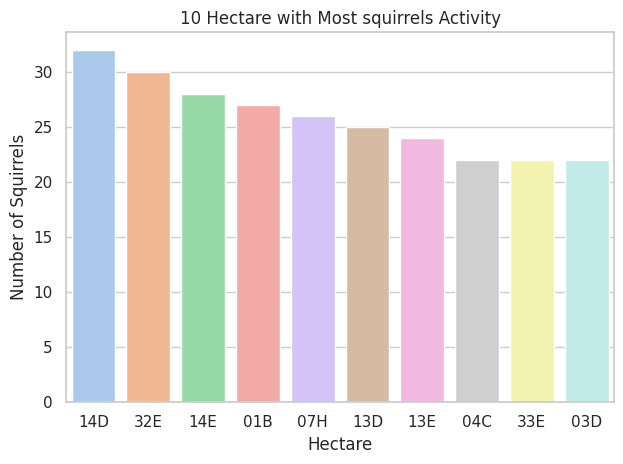

In [140]:
grouped = df.groupby('Hectare')['Number of Squirrels'].sum().reset_index().sort_values(by ='Number of Squirrels',ascending=False).head(10)
sns.barplot(
    x = 'Hectare',
    y = 'Number of Squirrels',
    data = grouped,
    hue = 'Hectare',
    legend= False,
    palette= 'pastel'
)
plt.title('10 Hectare with Most squirrels Activity')
plt.xlabel("Hectare")
plt.ylabel("Number of Squirrels")
plt.tight_layout()
plt.show()


### ⏰ Session Shifts (AM vs PM)

To understand **when the observation sessions were conducted**, we plotted a pie chart of the `Shift` column.  

The result shows:  
- **50% of sessions were in the morning (AM)**  
- **50% of sessions were in the afternoon/evening (PM)**  

👉 This means the dataset is evenly balanced between morning and afternoon sessions, so there is no time-of-day bias in the observations.


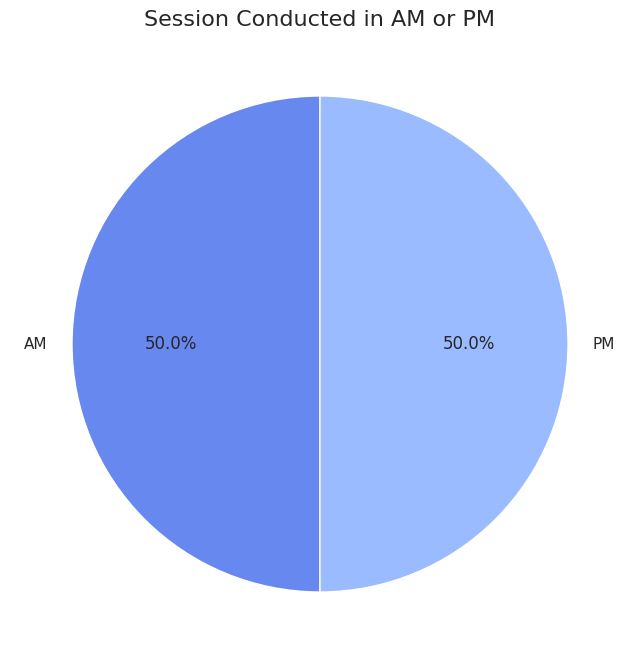

In [141]:
time = df['Shift'].value_counts()
sns.set(style='whitegrid')
plt.figure(figsize=(8,9))
plt.pie(
    time,
    labels=time.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm')
)
plt.title("Session Conducted in AM or PM",fontsize = 16)
plt.show()

### 🌿 Hectare Conditions

The bar plot shows the distribution of **hectare conditions** recorded during the sessions.  

👉 From this plot, we can see how often each condition was observed across the study area.  
This helps us understand the general environment during the squirrel sightings and whether activity levels (calm vs busy) may influence the observations.



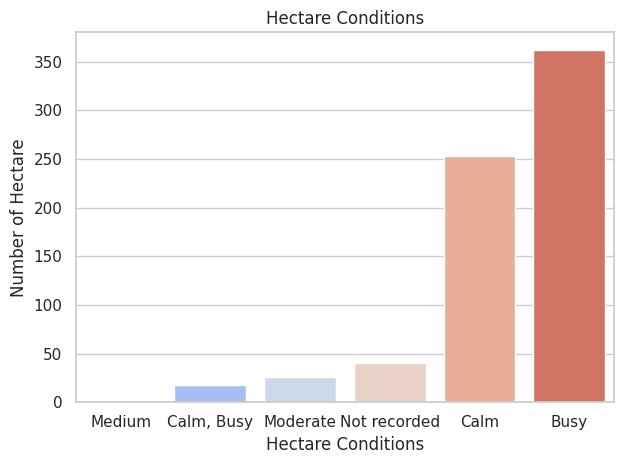

In [142]:
grouped = df['Hectare Conditions'].value_counts(ascending=True).reset_index()
sns.barplot(
    x = 'Hectare Conditions',
    y = 'count',
    data = grouped,
    palette='coolwarm',
    hue = 'Hectare Conditions',
    legend=False
)
plt.title("Hectare Conditions")
plt.ylabel("Number of Hectare")
plt.tight_layout()
plt.show()

Squirrel activity by time of day - Compare AM vs PM shifts to see when squirrels are more active

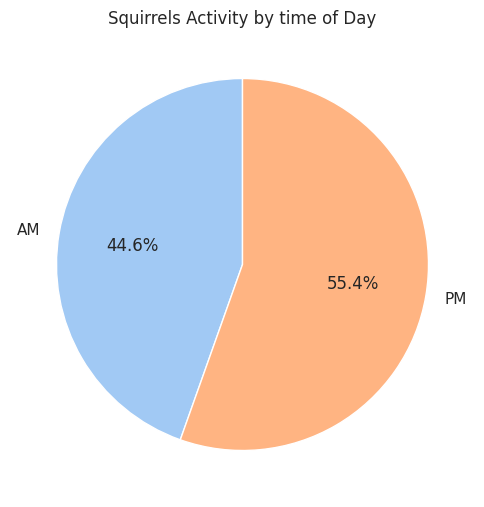

In [143]:
df.columns
grouped = df.groupby('Shift')['Number of Squirrels'].sum()
sns.set(style='whitegrid')
plt.figure(figsize=(6,7))
plt.pie(
    x = grouped,
    labels=grouped.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Squirrels Activity by time of Day")
plt.show()

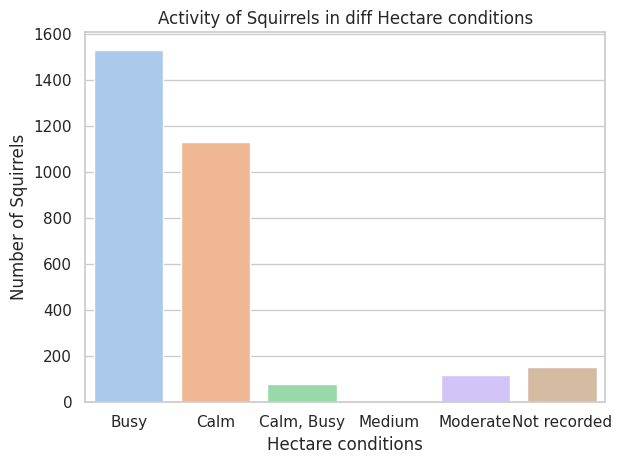

In [144]:
grouped = df.groupby('Hectare Conditions')['Number of Squirrels'].sum().reset_index()
sns.barplot(
    x = 'Hectare Conditions',
    y = 'Number of Squirrels',
    data = grouped,
    hue = 'Hectare Conditions',
    legend = False,
    palette='pastel'
)
plt.title("Activity of Squirrels in diff Hectare conditions")
plt.xlabel("Hectare conditions")
plt.ylabel("Number of Squirrels")
plt.tight_layout()
plt.show()


### 🌿 Squirrel Activity Across Hectare Conditions

The bar chart above shows squirrel sightings under different **hectare conditions**.  

- **Busy** areas had the highest number of sightings (around 1,500).  
- **Calm** areas were the second most common, with over 1,100 sightings.  
- A small number of sightings occurred in **Calm & Busy**, **Medium**, and **Moderate** conditions.  
- Some entries were **Not recorded**, showing missing environmental data.  

👉 This indicates that squirrels were most frequently observed in **busy** and **calm** conditions, suggesting these environments may be more favorable or simply more observed.


### 📅 Squirrel Sightings by Day (October 2018)

The original dataset contained a **`Date`** column in the format `mmddyy` (e.g., `10132018`).  
To make it usable, we converted it into a proper datetime object using:

```python
df["Date"] = pd.to_datetime(df["Date"], format="%m%d%Y")


In [145]:
# convert Date to proper datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m%d%Y")


In [146]:
df["Day"] = df["Date"].dt.day

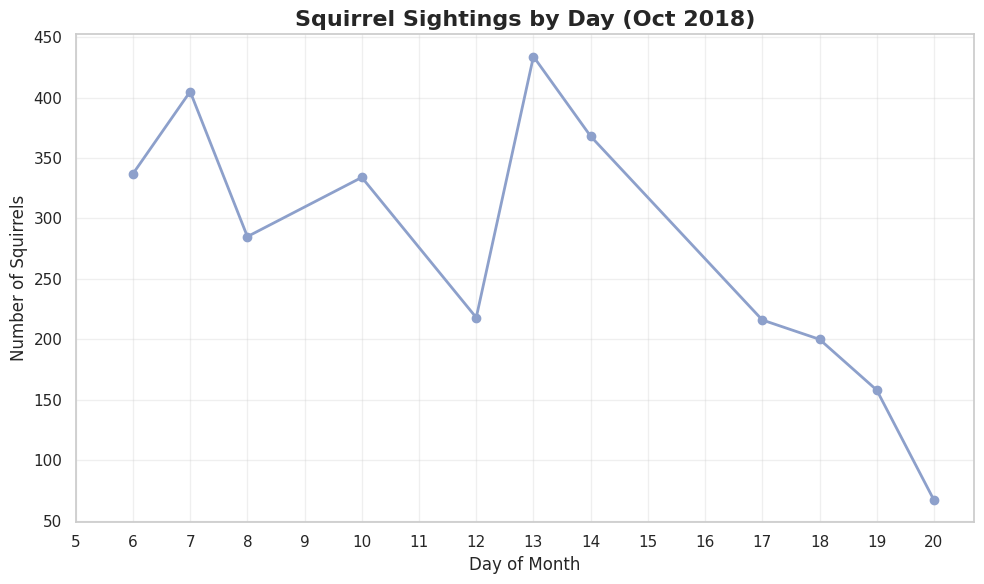

In [147]:
plt.figure(figsize=(10,6))

# pick a palette and grab a color (e.g. Set2[0])
palette = sns.color_palette("Set2", 13)

plt.plot(df.groupby("Day")["Number of Squirrels"].sum(),
         marker="o", linestyle="-", linewidth=2, markersize=6,
         color=palette[2])  # <- use a palette color here

plt.title("Squirrel Sightings by Day (Oct 2018)", fontsize=16, fontweight="bold")
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Number of Squirrels", fontsize=12)

plt.xticks(range(5, 21))  # since your data runs Oct 6–20
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



---

### 📈 Line Plot Markdown  

```markdown
### 🐿️ Squirrel Sightings by Day (October 2018)

The line plot shows the number of squirrel sightings for each day in **October 2018**.  

- Peak activity occurred on **October 13th** (over 430 sightings).  
- High counts were also seen on **October 7th** and **October 14th**.  
- After mid-October, sightings steadily declined, dropping below 100 by **October 20th**.  

👉 The line plot makes it easy to spot trends over time, showing that squirrel activity was **highest in the middle of the month** and tapered off towards the end.


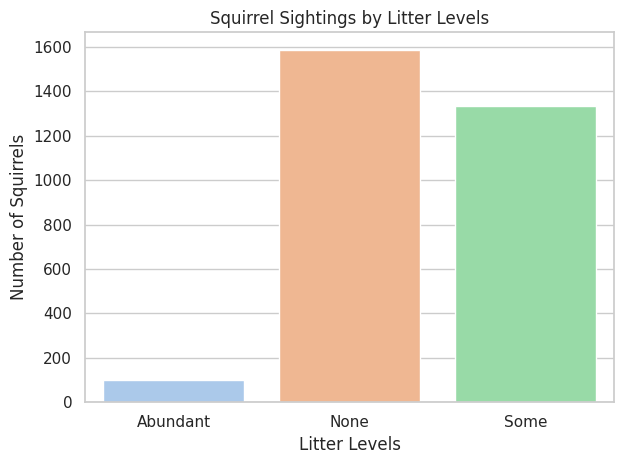

In [148]:
grouped = df.groupby('Litter')['Number of Squirrels'].sum().reset_index()
sns.barplot(
    x = 'Litter',
    y = 'Number of Squirrels',
    data = grouped,
    hue = 'Litter',
    legend = False,
    palette='pastel'
)
plt.title("Squirrel Sightings by Litter Levels")
plt.xlabel("Litter Levels")
plt.ylabel("Number of Squirrels")
plt.tight_layout()
plt.show()

### 🍂 Squirrel Sightings by Litter Level

This plot shows the distribution of squirrel sightings across different **litter levels** recorded in the park.  
The litter levels include categories such as:  
- **None** – no visible litter  
- **Some** – a noticeable amount of litter  
- **Abundant** – heavy litter presence  

📊 By comparing the counts, we can see how many squirrels were observed in each environment.  

👉 This helps us explore whether the presence of litter in an area has any relationship with squirrel activity.


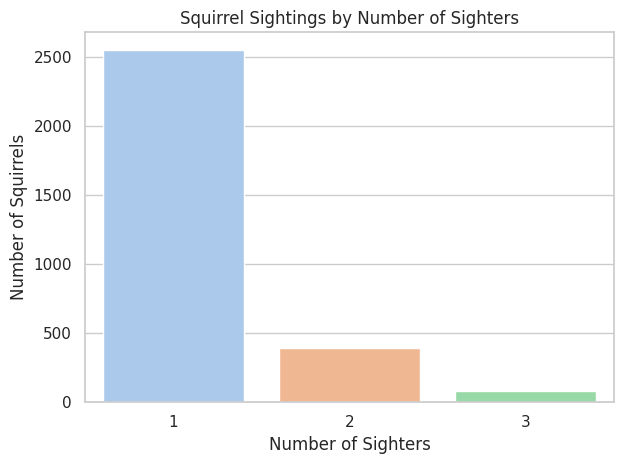

In [149]:
grouped = df.groupby("Number of sighters")['Number of Squirrels'].sum().reset_index()
sns.barplot(
    x = 'Number of sighters',
    y = 'Number of Squirrels',
    data = grouped,
    hue = 'Number of sighters',
    legend=False,
    palette='pastel'
)
plt.title("Squirrel Sightings by Number of Sighters")
plt.xlabel("Number of Sighters")
plt.ylabel("Number of Squirrels")
plt.tight_layout()
plt.show()

### 👀 Squirrel Sightings by Number of Sighters

The bar chart above shows how many squirrels were reported based on the **number of observers (sighters)** present during each session.  

- The majority of sightings were recorded by **1 sighter** (over 2,500 squirrels).  
- A smaller portion was observed by **2 sighters** (around 400 squirrels).  
- Very few sightings were recorded by **3 sighters** (less than 100 squirrels).  

👉 This suggests that most data in the dataset comes from individual observers, with fewer sessions involving multiple people.


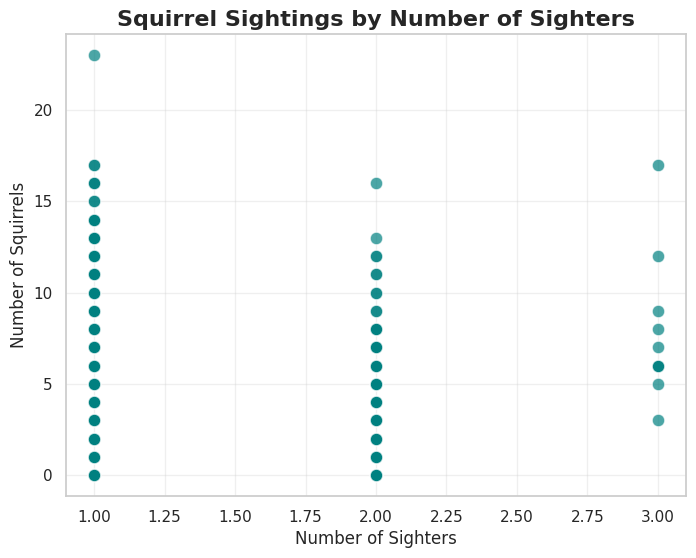

In [150]:
plt.figure(figsize=(8,6))

sns.scatterplot(x="Number of sighters", y="Number of Squirrels", 
                data=df, s=80, color="teal", alpha=0.7)

plt.title("Squirrel Sightings by Number of Sighters", fontsize=16, fontweight="bold")
plt.xlabel("Number of Sighters", fontsize=12)
plt.ylabel("Number of Squirrels", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

### 🐿️ Squirrel Sightings by Number of Sighters (Distribution)

The scatter plot above shows the **distribution of squirrel sightings** based on the number of sighters (observers).  

- Each dot represents the number of squirrels recorded in a single session.  
- Most sightings were made by **1 sighter**, with counts ranging from 0 up to 23 squirrels in one session.  
- With **2 sighters**, the number of squirrels per session varied mostly between 0–16.  
- With **3 sighters**, sightings also showed a wide spread, with some sessions recording over 15 squirrels.  

👉 This visualization gives more detail than the bar chart by showing the **variation within each category**, not just the totals.
